In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "pattern_indicators"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('pattern', 'close'), ('optimal_v2', 'close')],
                            param_spec={"pattern": {"period": 5}},
                            optimal_threshold={'buy':0.8},
                            spans=[],
                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi


Loading data from BTCUSDT-1m...


KeyboardInterrupt: 

In [4]:
edit_dataset = dataset.drop(["volume", "time", "open", "high", "low"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,CDLONNECK,CDLBREAKAWAY,CDLGRAVESTONEDOJI,CDLHIKKAKEMOD,CDLCOUNTERATTACK,CDLHAMMER,CDLHARAMI,CDLPIERCING,CDLHOMINGPIGEON,...,CDLMARUBOZU,CDL3LINESTRIKE,CDL3STARSINSOUTH,CDLXSIDEGAP3METHODS,CDLHIKKAKE,CDLTAKURI,CDLMATCHINGLOW,CDLGAPSIDESIDEWHITE,CDLSPINNINGTOP,optimal
4,4262.095484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4261.782857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4261.630236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4261.554824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4261.517339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,18519.207620,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0
1722409,18523.983810,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0
1722410,18525.301905,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0
1722411,18526.950952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,CDLONNECK,CDLBREAKAWAY,CDLGRAVESTONEDOJI,CDLHIKKAKEMOD,CDLCOUNTERATTACK,CDLHAMMER,CDLHARAMI,CDLPIERCING,CDLHOMINGPIGEON,...,CDL3WHITESOLDIERS,CDLMARUBOZU,CDL3LINESTRIKE,CDL3STARSINSOUTH,CDLXSIDEGAP3METHODS,CDLHIKKAKE,CDLTAKURI,CDLMATCHINGLOW,CDLGAPSIDESIDEWHITE,CDLSPINNINGTOP
0,9800.760005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3820.403660,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
2,5229.478667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6606.664532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
4,4327.698954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228805,5920.985367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
228806,6192.287419,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228807,9538.640304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
228808,3625.217130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [7]:
clf = RandomForestClassifier(random_state=69420, class_weight=class_weights, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)
clf.fit(trainX.drop("close", axis=1).values, trainy.values)

print(clf.score(testX.drop("close", axis=1).values, testy.values))

feature_importances = permutation_importance(clf, trainX.drop("close", axis=1).values, trainy.values, n_repeats=10, random_state=69420)

for i in range(len(feature_importances.importances_mean)):
    print('i: {}, Feature: {}, Score: {}'.format(i, trainX.drop("close", axis=1).columns[i], feature_importances.importances_mean[i]))

0.6748830822735018
i: 0, Feature: CDLONNECK, Score: 0.00047943708753991345
i: 1, Feature: CDLBREAKAWAY, Score: 8.303832874489992e-06
i: 2, Feature: CDLGRAVESTONEDOJI, Score: 0.00875617324417639
i: 3, Feature: CDLHIKKAKEMOD, Score: 0.0015397054324549075
i: 4, Feature: CDLCOUNTERATTACK, Score: 0.00042262138892533717
i: 5, Feature: CDLHAMMER, Score: 0.014084174642716708
i: 6, Feature: CDLHARAMI, Score: 0.014867794239762288
i: 7, Feature: CDLPIERCING, Score: 0.0002862637122503786
i: 8, Feature: CDLHOMINGPIGEON, Score: 0.00279664350334341
i: 9, Feature: CDLHARAMICROSS, Score: 0.004356015908395639
i: 10, Feature: CDLHIGHWAVE, Score: 0.011415147939338344
i: 11, Feature: CDL3BLACKCROWS, Score: 0.00030593068484773277
i: 12, Feature: CDLSTALLEDPATTERN, Score: -0.0003872208382500575
i: 13, Feature: CDLMORNINGDOJISTAR, Score: 0.00011669070407764881
i: 14, Feature: CDLTRISTAR, Score: 0.001310694462654649
i: 15, Feature: CDLCLOSINGMARUBOZU, Score: 0.018290721559372447
i: 16, Feature: CDLMATHOLD, Sco

In [27]:
sorted_features = sorted(feature_importances.importances_mean)

for i in range(len(sorted_features)):
    print('i: {}, Feature: {}, Score: {}'.format(i, trainX.drop("close", axis=1).columns[i], sorted_features[i]))

i: 0, Feature: CDLONNECK, Score: -0.00042830295878673044
i: 1, Feature: CDLBREAKAWAY, Score: -0.0003872208382500575
i: 2, Feature: CDLGRAVESTONEDOJI, Score: -0.00020191425199942437
i: 3, Feature: CDLHIKKAKEMOD, Score: 0.0
i: 4, Feature: CDLCOUNTERATTACK, Score: 0.0
i: 5, Feature: CDLHAMMER, Score: 0.0
i: 6, Feature: CDLHARAMI, Score: 6.992701367991572e-06
i: 7, Feature: CDLPIERCING, Score: 8.303832874489992e-06
i: 8, Feature: CDLHOMINGPIGEON, Score: 3.103011232031827e-05
i: 9, Feature: CDLHARAMICROSS, Score: 4.326733971423691e-05
i: 10, Feature: CDLHIGHWAVE, Score: 5.900091779209582e-05
i: 11, Feature: CDL3BLACKCROWS, Score: 0.00011669070407764881
i: 12, Feature: CDLSTALLEDPATTERN, Score: 0.0001472837725624232
i: 13, Feature: CDLMORNINGDOJISTAR, Score: 0.0002862637122503786
i: 14, Feature: CDLTRISTAR, Score: 0.00030593068484773277
i: 15, Feature: CDLCLOSINGMARUBOZU, Score: 0.00040601372317646824
i: 16, Feature: CDLMATHOLD, Score: 0.00042262138892533717
i: 17, Feature: CDLBELTHOLD, Scor

In [8]:
clf.feature_importances_

array([1.51436116e-03, 8.15700856e-05, 1.90093041e-02, 6.78533195e-03,
       2.35750969e-03, 1.95360222e-02, 3.27136271e-02, 1.30252711e-03,
       8.44032069e-03, 1.75270955e-02, 3.28925012e-02, 1.30284051e-03,
       3.49284500e-03, 1.61330620e-03, 5.03923087e-03, 9.97422047e-02,
       8.58551204e-06, 1.32793772e-01, 5.23322364e-05, 2.13855658e-04,
       5.15104066e-03, 1.13875516e-02, 1.19101080e-02, 1.01832545e-01,
       1.34787290e-02, 1.95655236e-02, 2.14149899e-02, 6.23043638e-08,
       3.43167938e-04, 4.05412997e-03, 1.22898089e-02, 1.62449551e-04,
       2.50692620e-02, 4.70263738e-02, 1.33562475e-03, 4.72143590e-04,
       2.55800248e-03, 1.07709512e-02, 4.19973481e-02, 2.06055885e-02,
       2.59265998e-03, 3.70238944e-03, 3.68545202e-02, 2.59063605e-02,
       2.02346306e-03, 4.37917763e-02, 3.55977059e-03, 1.21861711e-05,
       9.01106990e-03, 5.57442128e-02, 1.06277995e-02, 1.91148071e-02,
       1.15618863e-02, 3.76525534e-02])

In [22]:
reduced_classified_data = nu.classifyPoints(clf, testX, predict_proba=True, proba_thresh=0.77, plot_optimal=True, optimal=testy)

In [25]:
smaller_view_data = reduced_classified_data[000:1000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

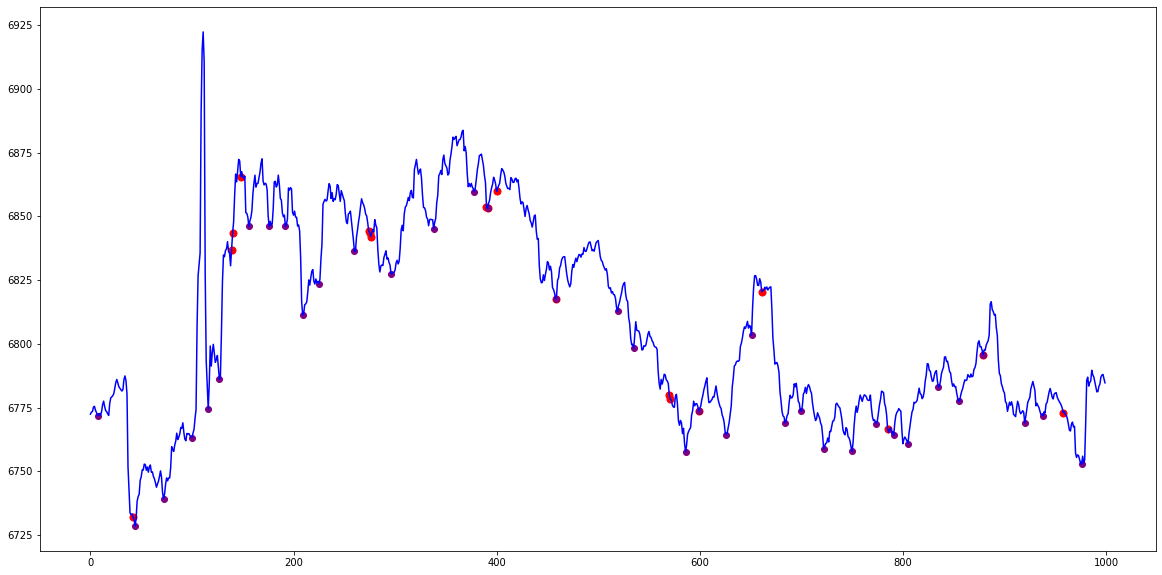

In [26]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [23]:
nu.exportModel(clf, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.0, is_nn=False)

In [ ]:
nu.testModel(model_name)